In [1]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

# Task 1: Make match outcome predictions based on net_goals and average bets.
We compare different methods to do prediction. 

In [2]:
matches = pd.read_csv('match_clean2.csv', index_col=0)
matches.head(10)

,country_id,league_id,season,stage,date,match_id,home_team_id,away_team_id,home_team_goal,away_team_goal,home_net_score,away_net_score,avg_h_bet,avg_d_bet,avg_a_bet
1,1,1,2008/2009,1,08/08/16,492474,10000,9994,0,0,0,0,1.898889,3.250000,3.616667
2,1,1,2008/2009,1,08/08/16,492475,9984,8635,0,3,0,0,2.462222,3.233333,2.544444
4,1,1,2008/2009,1,08/08/16,492477,7947,9985,1,3,0,0,4.494444,3.422222,1.674444
6,1,1,2008/2009,1,08/08/16,492479,9999,8571,2,2,0,0,1.957778,3.266667,3.400000
7,1,1,2008/2009,1,08/08/16,492480,4049,9996,1,2,0,0,2.714444,3.272222,2.316667
8,1,1,2008/2009,1,08/08/16,492481,10001,9986,1,0,0,0,2.222222,3.233333,2.842222
0,1,1,2008/2009,1,08/08/17,492473,9987,9993,1,1,0,0,1.765556,3.322222,4.164444
3,1,1,2008/2009,1,08/08/17,492476,9991,9998,5,0,0,0,1.438889,3.805556,6.533333
103,1,1,2008/2009,2,08/08/23,492486,9986,9999,1,0,-1,0,1.587778,3.483333,5.211111
104,1,1,2008/2009,2,08/08/23,492487,9994,4049,4,1,0,-1,1.640000,3.438889,4.753333


In [3]:
# returns the result of match: 0 homewin, 1 draw, 2 away win
def result(data):
    if data.home_team_goal > data.away_team_goal:
        return 0
    elif data.home_team_goal == data.away_team_goal:
        return 1
    else:
        return 2
matches['result'] = matches.apply(result, axis=1)
matches.head(10)

,country_id,league_id,season,stage,date,match_id,home_team_id,away_team_id,home_team_goal,away_team_goal,home_net_score,away_net_score,avg_h_bet,avg_d_bet,avg_a_bet,result
1,1,1,2008/2009,1,08/08/16,492474,10000,9994,0,0,0,0,1.898889,3.250000,3.616667,1
2,1,1,2008/2009,1,08/08/16,492475,9984,8635,0,3,0,0,2.462222,3.233333,2.544444,2
4,1,1,2008/2009,1,08/08/16,492477,7947,9985,1,3,0,0,4.494444,3.422222,1.674444,2
6,1,1,2008/2009,1,08/08/16,492479,9999,8571,2,2,0,0,1.957778,3.266667,3.400000,1
7,1,1,2008/2009,1,08/08/16,492480,4049,9996,1,2,0,0,2.714444,3.272222,2.316667,2
8,1,1,2008/2009,1,08/08/16,492481,10001,9986,1,0,0,0,2.222222,3.233333,2.842222,0
0,1,1,2008/2009,1,08/08/17,492473,9987,9993,1,1,0,0,1.765556,3.322222,4.164444,1
3,1,1,2008/2009,1,08/08/17,492476,9991,9998,5,0,0,0,1.438889,3.805556,6.533333,0
103,1,1,2008/2009,2,08/08/23,492486,9986,9999,1,0,-1,0,1.587778,3.483333,5.211111,0
104,1,1,2008/2009,2,08/08/23,492487,9994,4049,4,1,0,-1,1.640000,3.438889,4.753333,0


In [4]:
matches = matches.drop(['country_id', 'league_id', 'season', 'stage', 'date', 'match_id', 'home_team_id', 'away_team_id', 'home_team_goal', 'away_team_goal'], axis=1)
matches.head(10)

,home_net_score,away_net_score,avg_h_bet,avg_d_bet,avg_a_bet,result
1,0,0,1.898889,3.250000,3.616667,1
2,0,0,2.462222,3.233333,2.544444,2
4,0,0,4.494444,3.422222,1.674444,2
6,0,0,1.957778,3.266667,3.400000,1
7,0,0,2.714444,3.272222,2.316667,2
8,0,0,2.222222,3.233333,2.842222,0
0,0,0,1.765556,3.322222,4.164444,1
3,0,0,1.438889,3.805556,6.533333,0
103,-1,0,1.587778,3.483333,5.211111,0
104,0,-1,1.640000,3.438889,4.753333,0


<AxesSubplot:>

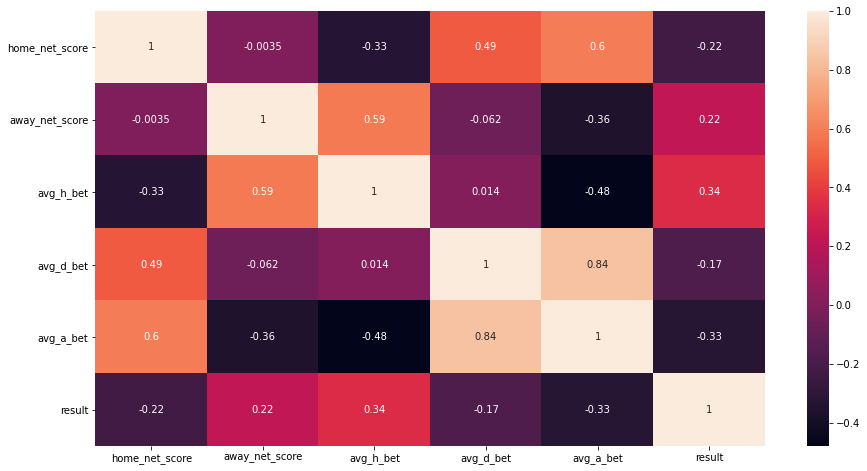

In [5]:
corr = matches.corr(method='pearson')
plt.figure(figsize=(15,8))
sns.heatmap(corr, annot=True)

In [6]:
def gaussianNB(train_x, train_y, test_x, test_y):
    gaussianNB = GaussianNB().fit(train_x, train_y)
    predict = gaussianNB.predict(test_x)
    score = accuracy_score(predict, test_y)
    return score

In [7]:
def random_forest(train_x, train_y, test_x, test_y):
    random_forest =  RandomForestClassifier(max_depth=5).fit(train_x, train_y)
    predict = random_forest.predict(test_x)
    score = accuracy_score(predict, test_y)
    return score

In [8]:
def logistic_regression(train_x, train_y, test_x, test_y):
    logit =  LogisticRegression().fit(train_x, train_y)
    predict = logit.predict(test_x)
    score = accuracy_score(predict, test_y)
    return score

In [9]:
def neural_network(train_x, train_y, test_x, test_y):
    nn =  MLPClassifier(hidden_layer_sizes=[30, 50, 10]).fit(train_x, train_y)
    predict = nn.predict(test_x)
    score = accuracy_score(predict, test_y)
    return score

In [10]:
def gb(train_x, train_y, test_x, test_y):
    gbt =  GradientBoostingClassifier().fit(train_x, train_y)
    predict = gbt.predict(test_x)
    score = accuracy_score(predict, test_y)
    return score

In [11]:
feature, target = matches.iloc[:, :5], matches.iloc[:, 5]

In [12]:
import warnings
warnings.filterwarnings('ignore')

testing on 0 rounds is done.
testing on 1 rounds is done.
testing on 2 rounds is done.
testing on 3 rounds is done.
testing on 4 rounds is done.
testing on 5 rounds is done.
testing on 6 rounds is done.
testing on 7 rounds is done.
testing on 8 rounds is done.
testing on 9 rounds is done.
average score for random forest on data is  0.5296238938053097
average score for gradient_boosting on data is  0.528274336283186
average score for Gaussian Naive Bayes on data is  0.43931415929203543
average score for logistic regression on data is  0.5288274336283185
average score for neural network on data is  0.5257300884955752


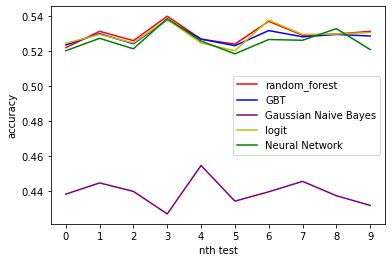

In [13]:
random_forests = []
gradient_boostings = []
GaussianNBs = []
MLPs = []
logistics = []
rf_sum = 0
gbt_sum = 0
gNB_sum = 0
logit_sum = 0
nn_sum = 0
n_test = 10
for i in range(n_test):
    train_x, test_x, train_y, test_y = train_test_split(feature, target, test_size=0.2, shuffle=True)
    rf_score = random_forest(train_x, train_y, test_x, test_y)
    gbt_score = gb(train_x, train_y, test_x, test_y)
    gnb_score = gaussianNB(train_x, train_y, test_x, test_y)
    logit_score = logistic_regression(train_x, train_y, test_x, test_y)
    nn_score = neural_network(train_x, train_y, test_x, test_y)
    random_forests.append(rf_score)
    rf_sum += rf_score
    gradient_boostings.append(gbt_score)
    gbt_sum += gbt_score
    GaussianNBs.append(gnb_score)
    gNB_sum += gnb_score
    logistics.append(logit_score)
    logit_sum += logit_score
    MLPs.append(nn_score)
    nn_sum += nn_score
    print("testing on " + str(i) + " rounds is done.")
print("average score for random forest on data is ", rf_sum / n_test)
print("average score for gradient_boosting on data is ", gbt_sum / n_test)
print("average score for Gaussian Naive Bayes on data is ", gNB_sum / n_test)
print("average score for logistic regression on data is ", logit_sum / n_test)
print('average score for neural network on data is ', nn_sum / n_test)
fig, ax = plt.subplots()
x = np.arange(n_test)
plt.plot(x, np.array(random_forests), color="r", label="random_forest")
plt.plot(x, np.array(gradient_boostings), color="b", label="GBT")
plt.plot(x, np.array(GaussianNBs), color="purple", label="Gaussian Naive Bayes")
plt.plot(x, np.array(logistics), color="y", label="logit")
plt.plot(x, np.array(MLPs), color='g', label='Neural Network')
plt.xlabel("nth test")
plt.xticks(np.arange(0, n_test, step=1))
plt.ylabel("accuracy")
plt.legend()
plt.show()
fig.savefig("methods_select.png")

# Task 2: design of betting stragegy:
We could think that the average return from each betting you choose to enter is:
$accuracy * (average \ choosing \ betting - 1) - (1-accuracy)$
$ = accuracy * average \ choosing \ betting - 1$
Therefore, we should choose a group of bettings to enter which has the maximum accuracy * average_choosing_betting. 

In [14]:
def betted(data):
    if data.predicted == 0:
        return data.avg_h_bet
    elif data.predicted == 1:
        return data.avg_d_bet
    else:
        return data.avg_a_bet

In [15]:
accuracy_time_avg_bet = []
accuracy_time_avg_bet2 = []
train_x, test_x, train_y, test_y = train_test_split(feature, target, test_size=0.1, shuffle=True)
randomforest =  RandomForestClassifier(max_depth=10, n_estimators=100).fit(train_x, train_y)
predicted = randomforest.predict(test_x)
prob = randomforest.predict_proba(test_x)
test_x['predicted'] = predicted
test_x['h_prob'] = prob[:, 0]
test_x['d_prob'] = prob[:, 1]
test_x['a_prob'] = prob[:, 2]
test_x['actual'] = test_y
test_x['bet'] = test_x.apply(betted, axis=1)
for p in range(0, 10, 1):
    proba = p / 10
    match_bet1 = test_x[(test_x.h_prob > proba) | \
        (test_x.d_prob > proba) | \
        (test_x.a_prob > proba) ]
    accuracy1 = accuracy_score(match_bet1['predicted'], match_bet1['actual'])
    avg_bet1 = np.mean(match_bet1['bet'])
    accuracy_time_avg_bet.append((accuracy1 * avg_bet1 - 1))
    
    match_bet2 = test_x[\
        (test_x.predicted == 0) & \
        (test_x.avg_h_bet < test_x.avg_d_bet) & \
        (test_x.avg_h_bet < test_x.avg_a_bet) &
        (test_x.h_prob > proba) | \
        (test_x.predicted == 1) & \
        (test_x.avg_d_bet < test_x.avg_h_bet) & \
        (test_x.avg_d_bet < test_x.avg_a_bet) &
        (test_x.d_prob > proba) | \
        (test_x.predicted == 2) & \
        (test_x.avg_a_bet < test_x.avg_d_bet) & \
        (test_x.avg_a_bet < test_x.avg_h_bet) &  \
        (test_x.a_prob > proba) ]
    accuracy2 = accuracy_score(match_bet2['predicted'], match_bet2['actual'])
    avg_bet2 = np.mean(match_bet2['bet'])
    accuracy_time_avg_bet2.append((accuracy2 * avg_bet2 - 1))

In [16]:
print(accuracy_score(test_x['predicted'], test_x['actual']))
print(accuracy_time_avg_bet)
print(accuracy_time_avg_bet2)

0.518141592920354
[-0.0017444580604745186, -0.0017444580604745186, -0.0017444580604745186, -0.0017444580604745186, -0.016839039533881328, -0.014934666622607895, -0.025286885721946706, 0.013339073276940727, 0.0007600921913959446, 0.03325401475694445]
[-0.011672929144396105, -0.011672929144396105, -0.011672929144396105, -0.011672929144396105, -0.018138528217853334, -0.014611893143971044, -0.025286885721946706, 0.013339073276940727, 0.0007600921913959446, 0.03325401475694445]


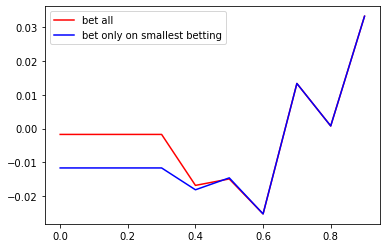

In [17]:
fig, ax = plt.subplots()
x = np.array([0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])
ax.plot(x, accuracy_time_avg_bet, color='r', label='bet all')
ax.plot(x, accuracy_time_avg_bet2, color='b', label='bet only on smallest betting')
plt.legend()
plt.show()
fig.savefig("bet_select2.png")

Therefore, we choose to choose the group which the prediction lies on the smallest betting amount 
and the prediction probability is over 90%

In [18]:
def money(data):
    if data.predicted == 0: # and data.avg_h_bet * data.h_prob > 1.2:
        if data.actual == 0:
            return (data.avg_h_bet-1)#  * (data.h_prob ** 40)
        else:
            return -1#  * (data.h_prob ** 40)
    elif data.predicted == 1: # and data.avg_d_bet * data.d_prob > 1.2:
        if data.actual == 1:
            return (data.avg_d_bet - 1)#  * (data.h_prob ** 40)
        else:
            return -1#  * (data.h_prob ** 40)
    elif data.predicted == 2: # and data.avg_a_bet * data.a_prob > 1.2:
        if data.actual == 2:
            return (data.avg_a_bet - 1)#  * (data.h_prob ** 40)
        else:
            return -1#  * (data.h_prob ** 40)
    else:
        return 0

In [19]:
returns = []
for i in range(100):  
    train_x, test_x, train_y, test_y = train_test_split(feature, target, test_size=0.1, shuffle=True)
    randomforest =  RandomForestClassifier(max_depth=10, n_estimators=100).fit(train_x, train_y)
    predicted = randomforest.predict(test_x)
    prob = randomforest.predict_proba(test_x)
    test_x['predicted'] = predicted
    test_x['h_prob'] = prob[:, 0]
    test_x['d_prob'] = prob[:, 1]
    test_x['a_prob'] = prob[:, 2]
    score = accuracy_score(test_x['predicted'], test_y)
    print(score)
    test_x['actual'] = test_y
    
    
    match_bet2 = test_x[\
          (test_x.predicted == 0) & \
          (test_x.avg_h_bet < test_x.avg_d_bet) & \
          (test_x.avg_h_bet < test_x.avg_a_bet) &
          (test_x.h_prob > 0.9) | \
          (test_x.predicted == 1) & \
          (test_x.avg_d_bet < test_x.avg_h_bet) & \
          (test_x.avg_d_bet < test_x.avg_a_bet) &
          (test_x.d_prob > 0.9) | \
          (test_x.predicted == 2) & \
          (test_x.avg_a_bet < test_x.avg_d_bet) & \
          (test_x.avg_a_bet < test_x.avg_h_bet) &  \
          (test_x.a_prob > 0.9) ]
    money_win = match_bet2.apply(money, axis=1)
    accuracy = accuracy_score(match_bet2['predicted'], match_bet2['actual'])
    match_bet2['bet'] = match_bet2.apply(betted, axis=1)
    print(np.mean(match_bet2['bet']) * accuracy)
    print()
    return_rate = np.sum(money_win)
    returns.append(return_rate)
returns = np.array(returns)
print()
print(returns.mean())
print(returns.var())
print(np.sum(returns > 0))
print(returns)


0.5323008849557522
1.0735562006781292

0.5106194690265486
1.0084966422466421

0.5146017699115044
0.9949517084652217

0.5415929203539823
1.0656055031966494

0.5486725663716814
0.9925722420085302

0.5292035398230088
1.0010013597348517

0.5384955752212389
0.963540895972714

0.5398230088495575
1.0728279233261933

0.5389380530973451
1.0681334824363669

0.5283185840707965
1.060791230419609

0.5238938053097345
0.9602215584310182

0.534070796460177
1.0977535801000942

0.5336283185840708
1.0317933009394231

0.5252212389380531
1.0456138818446512

0.5278761061946903
1.062485985167567

0.5256637168141592
0.9853093587781678

0.5265486725663717
1.0105283413168027

0.5349557522123893
0.9807966404043406

0.5358407079646018
0.9434095017636683

0.5323008849557522
1.130993239271017

0.5305309734513274
0.9838580729166668

0.5314159292035399
1.0591655370443251

0.5185840707964602
0.8846868455136686

0.5141592920353982
1.0320769382133015

0.5172566371681416
1.1137874779541446

0.5486725663716814
1.009260224

That means if we invest 1 dollars for each bets that we choose to enter, we will get total average 0.84 returns. 
Overall, there are 6/10 cases we get positive returns. 
We also notice that if accuracy * avg_betting_amount > 1, we will win money. That is we need to either increase prediction accuracy or select the a group of bettings to enter which may have the highest accuracy * avg_betting_amount. 